In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/content/netflix_titles.csv')

In [6]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [8]:
df.shape

(8807, 12)

There are 12 columns and 8807 rows in the data


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


By looking at the above information we have find out following points:-
1) There are missing values in columns:- director,cast,date_added,rating,duration.
2) We need to chance the data type of various columns.

In [10]:
df.duplicated().sum()

0

There are no duplicate values.

In [11]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


##DATA PREPROCESSING


#####Handling Missing Values

In [12]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
df['country'].fillna(df['country'].mode()[0],inplace=True)
df['date_added'].fillna(df['date_added'].mode()[0],inplace=True)
df['rating'].fillna(df['rating'].mode()[0],inplace=True)

In [14]:
df['director'].fillna('No information',inplace=True)
df['cast'].fillna('No data',inplace=True)
df['duration'].fillna('Not known',inplace=True)

####Removing Duplicates

In [15]:
df.duplicated().sum()

0

There are no duplicate values in our data.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


####Changing the data types

In [17]:
df['date_added']=pd.to_datetime(df['date_added'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [19]:
df=df.rename(columns={'listed_in':'Genre'})
df['Genre']=df['Genre'].apply(lambda x:x.split(','))

###Content Analysis
Q1 What is the distribution of content types (movies vs. TV shows) on Netflix?



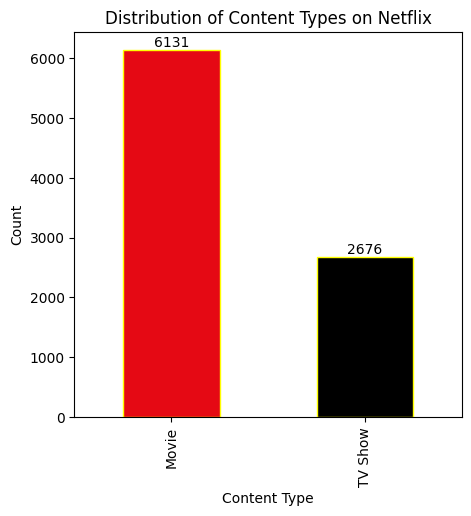

In [20]:
plt.figure(figsize=(5,5))
#Defining the color Scheme
netflix_red = '#E50914'
netflix_black = '#000000'
colors = [netflix_red, netflix_black]
df['type'].value_counts().plot(kind='bar', color=colors, edgecolor='yellow')

# Adding labels and title
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')

# Adding data labels on top of the bars
for index, value in enumerate(df['type'].value_counts()):
    plt.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=10)


plt.show()

####Q2 Which countries contribute the most content to Netflix?


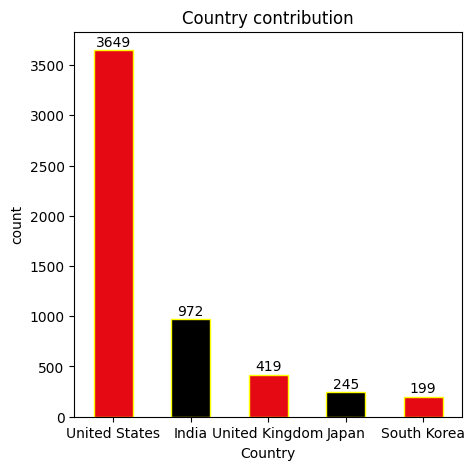

In [21]:
plt.figure(figsize=(5,5))

#Defining the color Scheme
netflix_red = '#E50914'
netflix_black = '#000000'
colors = [netflix_red, netflix_black]
df['country'].value_counts().head(5).plot(kind='bar',color=colors,edgecolor='yellow')

plt.title('Country contribution')
plt.xlabel('Country')
plt.ylabel('count')

plt.xticks(rotation=0)

# Adding data labels on top of the bars
for index, value in enumerate(df['country'].value_counts().head(5)):
    plt.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

###Q3.What are the most common genres or categories of content on Netflix?

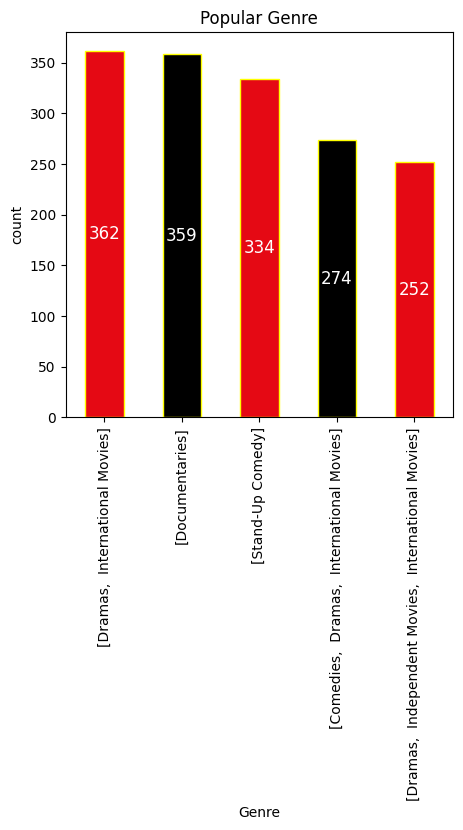

In [22]:
plt.figure(figsize=(5,5))
netflix_red = '#E50914'
netflix_black = '#000000'
colors = [netflix_red, netflix_black]
df['Genre'].value_counts().head(5).plot(kind='bar',color=colors,edgecolor='yellow')

plt.title('Popular Genre')
plt.xlabel('Genre')
plt.ylabel('count')

# Adding data labels on top of the bars
for i, count in enumerate(df['Genre'].value_counts().head(5)):
    plt.text(i, count/2, str(count), ha='center', va='center', fontsize=12,color='white')  # Adjust the vertical alignment (va)

plt.show()



####Q4. How has the content library evolved over the years in terms of the number of titles added?

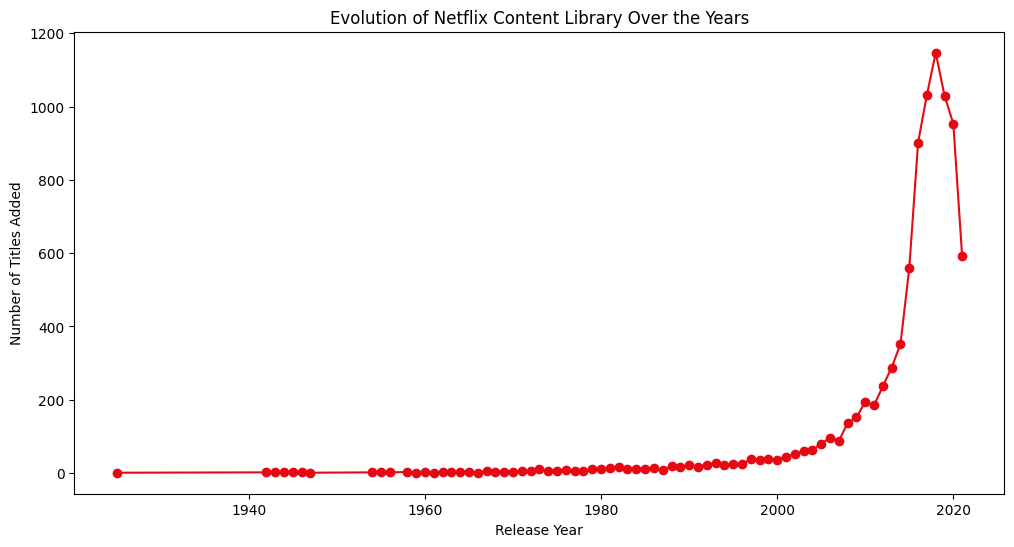

In [55]:
content_evolution=df['title'].groupby(df['release_year']).count()
plt.figure(figsize=(12,6))
plt.plot(content_evolution.index, content_evolution.values, marker='o',color='#E50914', linestyle='-')

# Adding labels and title
plt.title('Evolution of Netflix Content Library Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles Added')

plt.show()

###Content Popularity

####Are there any trends in the popularity of content by release year or genre?



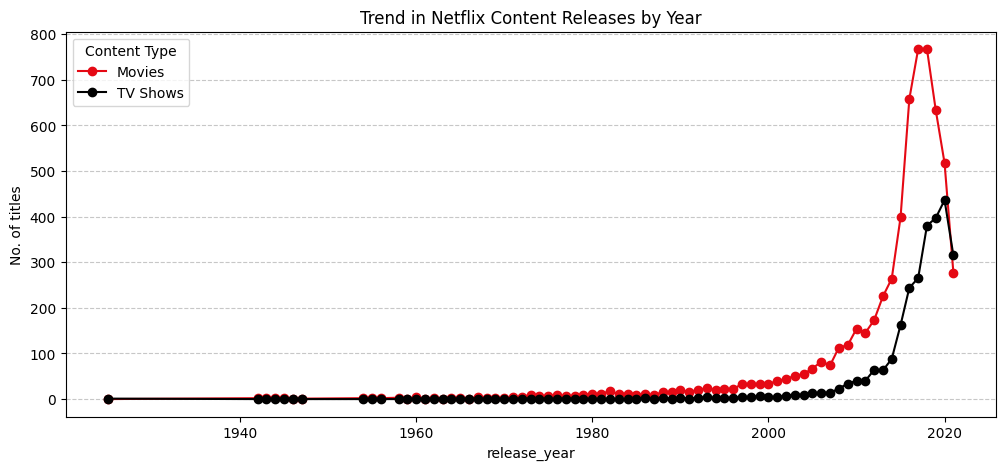

In [54]:
release_year_counts = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(12,5))
plt.plot(release_year_counts.index, release_year_counts['Movie'], label='Movies',color='#E50914', marker='o')
plt.plot(release_year_counts.index, release_year_counts['TV Show'], label='TV Shows',color= '#000000' ,marker='o')


plt.title('Trend in Netflix Content Releases by Year')
plt.xlabel('release_year')
plt.ylabel('No. of titles')
plt.legend(title='Content Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

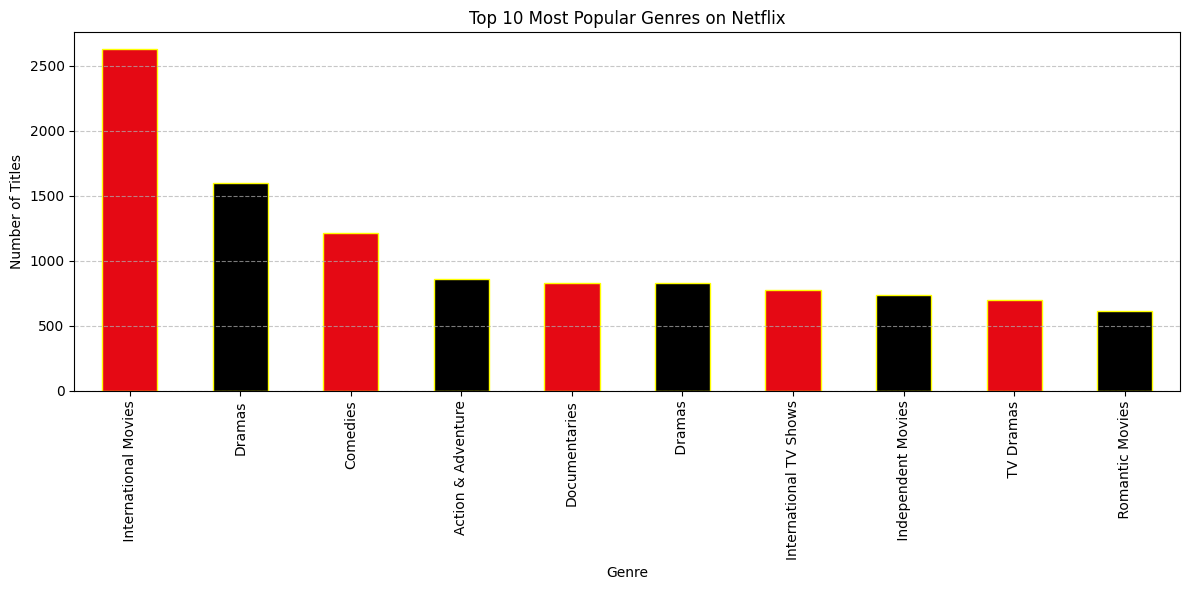

In [52]:
#Trend in Netflix content by Genre

# Grouping by Genre: Count the occurrences of each genre
genre_counts = df['Genre'].explode().value_counts()

# Visualize genre trends using a bar chart

netflix_red = '#E50914'
netflix_black = '#000000'
colors = [netflix_red, netflix_black]

genre_counts.head(10).plot(kind='bar', figsize=(12, 6),color=colors,edgecolor='yellow')
plt.title('Top 10 Most Popular Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

##Content Duration and Ratings:

1)What is the average duration (runtime) of movies and TV shows on Netflix?

float64


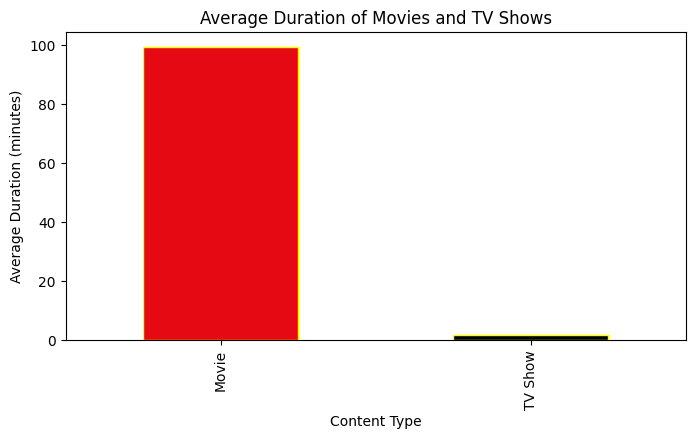

In [64]:
# Check the data type of the 'duration' column
print(df['duration'].dtype)

# If it's not already in a numeric format, extract numeric values
if df['duration'].dtype != float:
    df['duration'] = df['duration'].str.extract('(\d+)').astype(float)


# Group by 'type' (Movie or TV Show) and calculate the average duration
average_duration = df.groupby('type')['duration'].mean()

# Define colors
netflix_red = '#E50914'
netflix_black = '#000000'
colors = [netflix_red, netflix_black]

# Create a bar plot to visualize the average duration
plt.figure(figsize=(8, 4))
average_duration.plot(kind='bar', color=colors, edgecolor='yellow')
plt.title('Average Duration of Movies and TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Average Duration (minutes)')

plt.show()


2)Is there a correlation between content duration and user ratings?

In [72]:
# If it's not already in a numeric format, extract numeric values
if df['duration'].dtype != float:
    df['duration'] = df['duration'].str.extract('(\d+)').astype(float)

# Handle non-numeric values in the 'rating' column (e.g., convert 'TV-MA' to a numeric scale)
# We can define a mapping dictionary based on  specific data
rating_mapping = {
    'PG-13': 13,
    'TV-MA': 17,
    'PG': 7,
    'TV-14': 14,
    'TV-PG': 7,
    'TV-Y': 2,
    'TV-Y7': 7,
    'R': 17,
    'TV-G': 0,
    'G': 0,
    'NC-17': 17,
    'NR': None,  # Handle non-numeric values appropriately
    'TV-Y7-FV': 7,
    'UR': None  # Handle non-numeric values appropriately
}

# Apply the mapping to the 'rating' column
df['rating'] = df['rating'].map(rating_mapping)

# Perform a correlation analysis
correlation_coefficient = df['duration'].corr(df['rating'])

# Print the correlation coefficient
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')



Correlation Coefficient: 0.16


A *correlation coefficient* of **0.16** suggests a **weak positive relationship**, meaning that there is a *slight tendency for content with longer durations to have slightly higher user ratings.*

However, the **correlation is weak**, which means that there are many other factors influencing user ratings, and the relationship is not strong enough to make strong predictions based solely on content duration.

###Content Creators and Directors:

Who are the most prolific content creators and directors on Netflix?

In [77]:
# Create a DataFrame to count the number of titles for each director
director_counts = df['director'].str.split(', ').explode().value_counts().reset_index()
director_counts.columns = ['Director', 'Title Count']

# Sort the DataFrame by 'Title Count' in descending order to find the most prolific directors
most_prolific_directors = director_counts.sort_values(by='Title Count', ascending=False)

# Print the top 10 most prolific directors
print(most_prolific_directors.head(10))


              Director  Title Count
0       No information         2634
1        Rajiv Chilaka           22
2            Jan Suter           21
3          Raúl Campos           19
4          Suhas Kadav           16
5         Marcus Raboy           16
6            Jay Karas           15
7  Cathy Garcia-Molina           13
8      Martin Scorsese           12
9          Jay Chapman           12


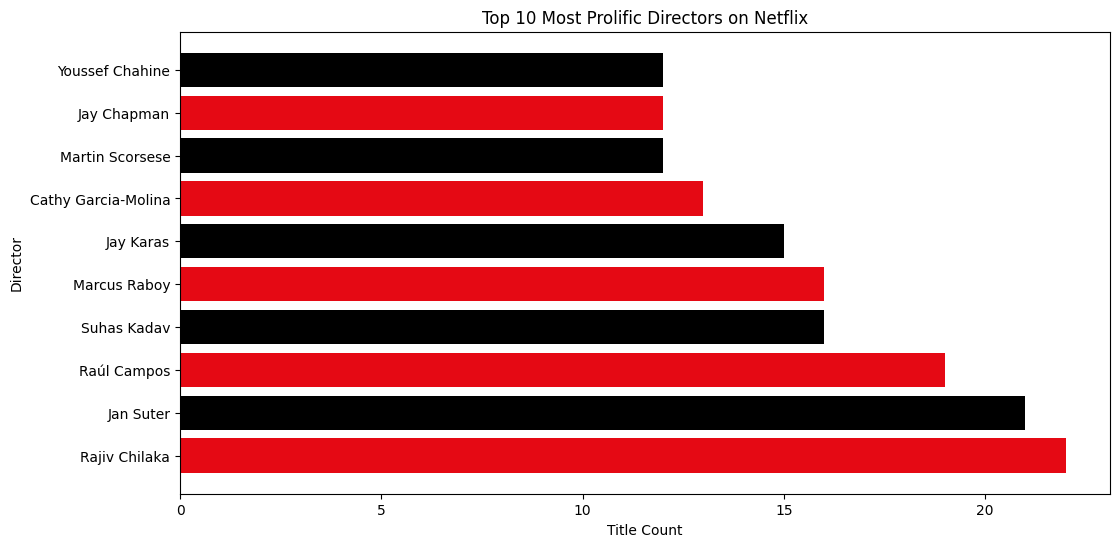

In [84]:
# Filter out rows with "No information" in the 'Director' column
most_prolific_directors_filtered = most_prolific_directors[most_prolific_directors['Director'] != 'No information']

# Select the top 10 most prolific directors to visualize
top_n = 10
top_directors = most_prolific_directors_filtered.head(top_n)

# Create a horizontal bar plot
plt.figure(figsize=(12, 6))
plt.barh(top_directors['Director'], top_directors['Title Count'], color=colors)
plt.xlabel('Title Count')
plt.ylabel('Director')
plt.title(f'Top {top_n} Most Prolific Directors on Netflix')

# Display the plot
plt.show()


In [24]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No information,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
